# Classification

## Project 1: Naive Bayes

Looking at scatter plots, define a decision surface to classify points.

Assume the probability distribution of features is realated to that of the label i.e. prior and posteriar

In [62]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
#sys.path.append("../tools/")
sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/tools")
#/home/rachas/PycharmProjects/Udacity/ud120-projects-master/tools
from email_preprocess import preprocess

import pickle
import numpy

### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [63]:
from sklearn.naive_bayes import GaussianNB

t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
print("{} {} {}".format("training time:", round(time() - t0,3), "s"))

t0 = time()
pred= clf.predict(features_test)
print("{} {} {}".format("prediction time:", round(time() - t0,3), "s"))

training time: 0.823 s
prediction time: 0.129 s


In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test,pred)

0.97326507394766781

## Project 2: SVM

Optimise the margin to maximise robustness.

Use the "kernal trick" to seperate the feature space.

Gamma value doesn't effect the linear kernal, low values mean training values have a far reach and vice versa

C parameter controls tradeoff between a smooth decision boundary and classifying training points correctly


In [42]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/tools")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###

#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [ ]:
from sklearn.svm import SVC

t0 = time()
clf = SVC(kernel="linear")

clf.fit(features_train, labels_train)
print("{} {} {}".format("training time:", round(time() - t0,3), "s"))

pred = clf.predict(features_test)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test,pred)

0.88452787258248011

In [25]:
split_size = int(len(features_train)/100)

features_train = features_train[:split_size]
labels_train = labels_train[:split_size]

In [43]:
from sklearn.svm import SVC

t0 = time()
clf = SVC(kernel="rbf", C = 10000)

clf.fit(features_train, labels_train)
print("{} {} {}".format("training time:", round(time() - t0,3), "s"))

pred = clf.predict(features_test)

training time: 87.554 s


In [44]:
accuracy_score(labels_test,pred)

0.99089874857792948

In [45]:
pred[50]

1

In [46]:
pred1 = pred.tolist()

In [47]:
pred1.count(1)

877

In [48]:
pred1.count(0)

881

## Project 3: Decision Tree

min sample split = what the size of the bottom layer in the tree should be, default is 2

entropy controls where the split should occur = sum of -p*log2(p)

information gain = entropy(parent) - [weight average] of entropy(children)

the decision tree will maximise the information gain

prone to overfitting

bias = model is less influenced by the data and is systematically different from the truth

variance = how far values are spread

In [35]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/tools")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###


#########################################################



no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [36]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
clf = DecisionTreeClassifier(min_samples_split=40)

clf.fit(features_train, labels_train)

pred = clf.predict(features_test)


In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, pred)

0.97781569965870307

In [39]:
len(features_train[0])

3785

## Choose your own

### K nearest neighbours

Measures the distance between one point and measures the "distance" in between points to assign the class.

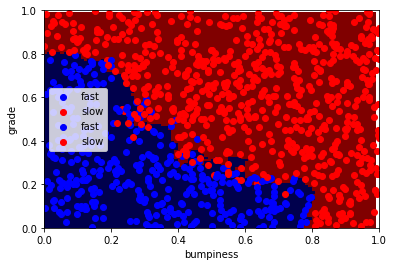

In [60]:
#!/usr/bin/python

import matplotlib.pyplot as plt

sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/choose_your_own")

from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4)

clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, pred)

0.93999999999999995

### Adaboost

Creates a strong classifier from an ensemble of weak classifiers. Weak models are built and then a model is build to optimise the weak models, this continues in layers until the layer max is reached.

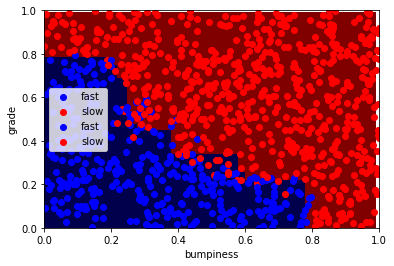

In [103]:
#!/usr/bin/python

import matplotlib.pyplot as plt

sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/choose_your_own")

from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42, learning_rate=1, n_estimators= 50)

clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [104]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, pred)

0.92400000000000004

### Random Forest

A collection of decision trees, taking the mode output from each tree, this helps with overfitting.

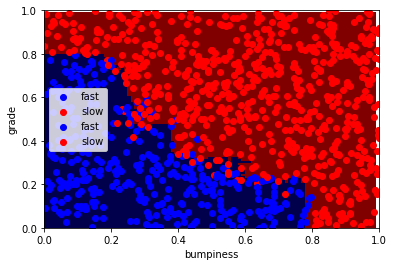

In [157]:
#!/usr/bin/python

import matplotlib.pyplot as plt

sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/choose_your_own")

from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, random_state=42)

clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [158]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, pred)

0.92400000000000004